 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

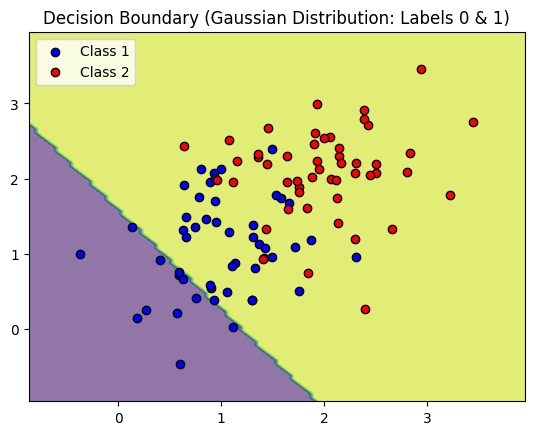

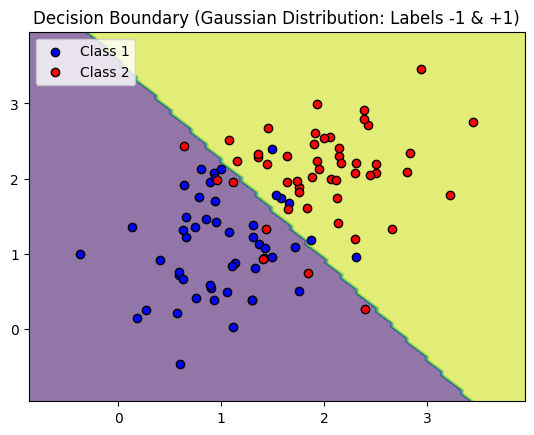

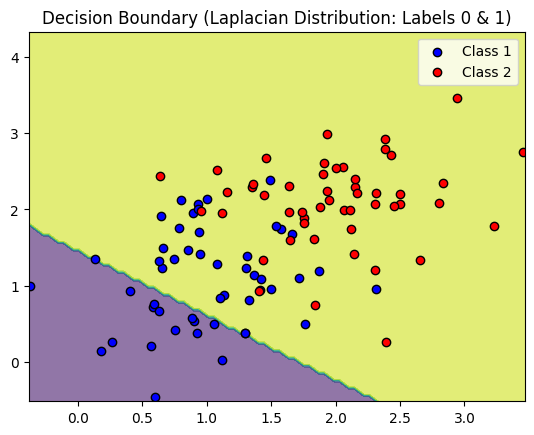

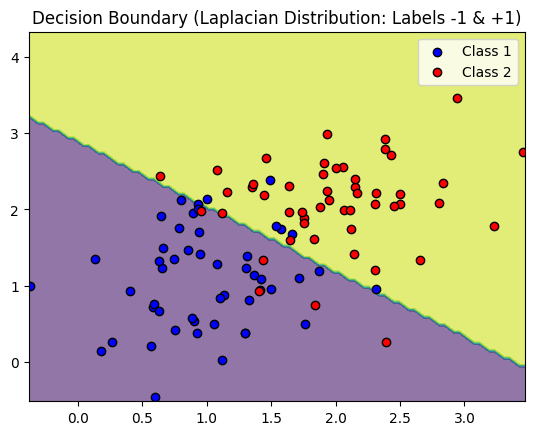

In [ ]:

########################################
#Part-1)-a: Data generation
########################################

import numpy as np
import matplotlib.pyplot as plt

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate Gaussian training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine training data

# Generate Gaussian testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine testing data

########################################
# Function to classify using least squares
########################################
def LS_Classify(X_train, Y_train, X_test):

    # Add bias term to training and testing data
    X_train_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_test_bias = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

    # Compute weight vector using pseudo-inverse solution
    W = np.linalg.pinv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ Y_train

    # Predict labels for test data
    Y_pred = X_test_bias @ W

    return Y_pred

##########################################
# Function to visualize decision boundary
##########################################
def plot_decision_boundary(X_train, Y_train, title):

    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = LS_Classify(X_train, Y_train, grid_points)
    Z_binary = (Z >= 0).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z_binary, alpha=0.6)
    plt.scatter(class1_tr[:, 0], class1_tr[:, 1], label="Class 1", color="blue", edgecolor="k")
    plt.scatter(class2_tr[:, 0], class2_tr[:, 1], label="Class 2", color="red", edgecolor="k")

    plt.title(title)
    plt.legend()
    plt.show()

##########################################
# Part-1: Gaussian with target labels (0 and 1)
##########################################
tr_targets_01 = np.hstack((np.zeros(50), np.ones(50)))   # Target labels: "0" for class1 and "1" for class2

plot_decision_boundary(tr_data, tr_targets_01,
                       title="Decision Boundary (Gaussian Distribution: Labels 0 & 1)")

##########################################
# Part-2: Gaussian with target labels (-1 and +1)
##########################################
tr_targets_pm = np.hstack((-np.ones(50), np.ones(50)))   # Target labels: "-1" for class1 and "+1" for class2

plot_decision_boundary(tr_data, tr_targets_pm,
                       title="Decision Boundary (Gaussian Distribution: Labels -1 & +1)")

##########################################
# Part-3: Laplacian with target labels (0 and 1)
##########################################
def generate_laplacian_data(mean, size):

    return mean + np.random.laplace(loc=0.0, scale=0.3**0.5 / (2**0.5), size=size)

class1_tr_laplace = generate_laplacian_data(mean1, (50, len(mean1)))
class2_tr_laplace = generate_laplacian_data(mean2, (50, len(mean2)))
tr_data_laplace = np.vstack((class1_tr_laplace, class2_tr_laplace))

tr_targets_01_laplace = tr_targets_01.copy()

plot_decision_boundary(tr_data_laplace,
                       tr_targets_01_laplace,
                       title="Decision Boundary (Laplacian Distribution: Labels 0 & 1)")

##########################################
# Part-4: Laplacian with target labels (-1 and +1)
##########################################
tr_targets_pm_laplace = tr_targets_pm.copy()

plot_decision_boundary(tr_data_laplace,
                       tr_targets_pm_laplace,
                       title="Decision Boundary (Laplacian Distribution: Labels -1 & +1)")









<b> Report your observations </b>

1.The decision boundaries remained constant in the both graphs.this shows that model does not affect the ability to classify the data or determine the boundary.

2.The decision boundaries for Gaussian and Laplacian distributions are slightly different. The Laplacian distribution produces a sharper separation near the boundary due to its more specifications, whereas the Gaussian distribution results in smoother transitions between classes.

3.There is overlap between Class 1 (blue) and Class 2 (red) near the decision boundary.





<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


Accuracy with LDA: 89.75%


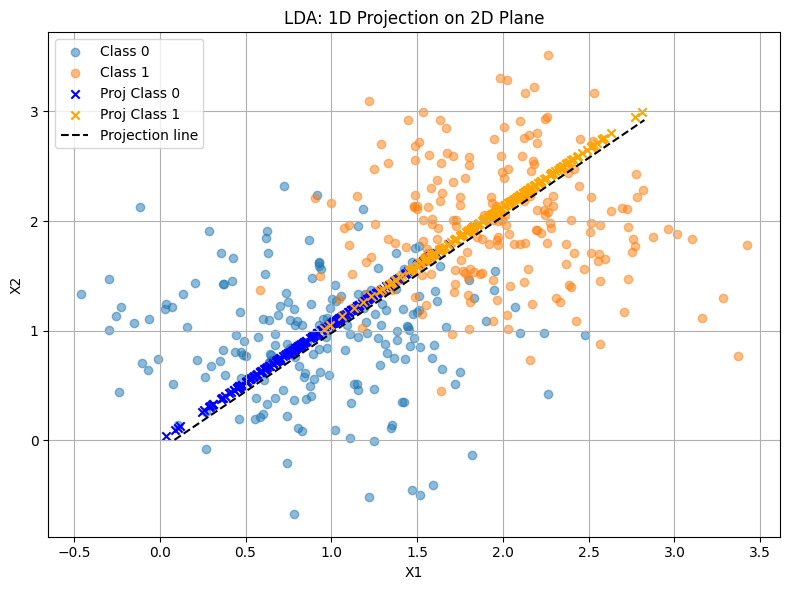

Accuracy with FDA: 89.75%


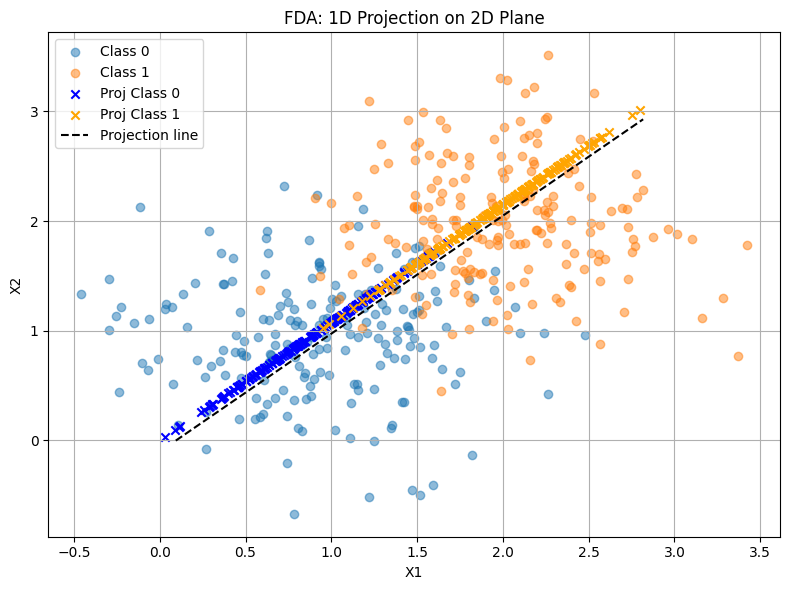

Accuracy with FDA (N-D to 1-D): 10.25%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

########################################
# Part-2)-(a): Data generation
########################################
np.random.seed(0)

# Set the parameters of class distribution
mean1 = [1, 1]
mean2 = [2, 2]
cov = [[0.3, 0], [0, 0.3]]

# Generate training and testing data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.vstack((class1_tr, class2_tr))
tr_targets = np.hstack((np.zeros(50), np.ones(50)))

class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
te_data = np.vstack((class1_te, class2_te))
te_targets = np.hstack((np.zeros(200), np.ones(200)))

########################################
# Part-2)-(b): LDA (between-class only)
########################################
def LDA_classify(X_train, Y_train, X_test):
    mean0 = np.mean(X_train[Y_train==0], axis=0)
    mean1 = np.mean(X_train[Y_train==1], axis=0)
    w = (mean1 - mean0).reshape(-1,1)
    projections = X_train @ w
    threshold = (np.mean(projections[Y_train==0]) + np.mean(projections[Y_train==1])) / 2
    test_proj = X_test @ w
    predictions = (test_proj > threshold).astype(int).flatten()
    return predictions, w

########################################
# Part-2)-(c): FDA (between + within-class)
########################################
def FDA_classify(X_train, Y_train, X_test):
    mean0 = np.mean(X_train[Y_train==0], axis=0)
    mean1 = np.mean(X_train[Y_train==1], axis=0)
    S_w = np.cov(X_train[Y_train==0].T) + np.cov(X_train[Y_train==1].T)
    w = np.linalg.inv(S_w) @ (mean1 - mean0)
    w = w.reshape(-1,1)
    projections = X_train @ w
    threshold = (np.mean(projections[Y_train==0]) + np.mean(projections[Y_train==1])) / 2
    test_proj = X_test @ w
    predictions = (test_proj > threshold).astype(int).flatten()
    return w, predictions

########################################
# Common: Plot 2D + projected 1D on same graph
########################################
def plot_projection_on_2D(X_test, Y_test, w, title):
    w_unit = w / np.linalg.norm(w)
    proj_points = (X_test @ w_unit) @ w_unit.T

    plt.figure(figsize=(8,6))
    plt.scatter(X_test[Y_test==0][:,0], X_test[Y_test==0][:,1], label='Class 0', alpha=0.5)
    plt.scatter(X_test[Y_test==1][:,0], X_test[Y_test==1][:,1], label='Class 1', alpha=0.5)

    plt.scatter(proj_points[Y_test==0][:,0], proj_points[Y_test==0][:,1],
                label='Proj Class 0', marker='x', color='blue')
    plt.scatter(proj_points[Y_test==1][:,0], proj_points[Y_test==1][:,1],
                label='Proj Class 1', marker='x', color='orange')

    # Projection line
    mean_all = np.mean(X_test, axis=0)
    line_pts = np.array([mean_all - 2*w_unit.flatten(), mean_all + 2*w_unit.flatten()])
    plt.plot(line_pts[:,0], line_pts[:,1], 'k--', label='Projection line')

    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

########################################
# Run LDA (2D to 1D)
########################################
pred_lda, w_lda = LDA_classify(tr_data, tr_targets, te_data)
acc_lda = np.mean(te_targets == pred_lda)
print(f"Accuracy with LDA: {acc_lda * 100:.2f}%")
plot_projection_on_2D(te_data, te_targets, w_lda, title="LDA: 1D Projection on 2D Plane")

########################################
# Run FDA (2D to 1D)
########################################
w_fda, pred_fda = FDA_classify(tr_data, tr_targets, te_data)
acc_fda = np.mean(te_targets == pred_fda)
print(f"Accuracy with FDA: {acc_fda * 100:.2f}%")
plot_projection_on_2D(te_data, te_targets, w_fda, title="FDA: 1D Projection on 2D Plane")

########################################
# Part-2)-(d): FDA N-D to K-D projection (K=1)
########################################
def FDA_project_K(X_train, Y_train, k):
    classes = np.unique(Y_train)
    mean_overall = np.mean(X_train, axis=0)
    S_w = np.zeros((X_train.shape[1], X_train.shape[1]))
    S_b = np.zeros((X_train.shape[1], X_train.shape[1]))

    for c in classes:
        X_c = X_train[Y_train == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]
        S_w += np.cov(X_c.T) * (n_c - 1)
        mean_diff = (mean_c - mean_overall).reshape(-1, 1)
        S_b += n_c * (mean_diff @ mean_diff.T)

    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(S_w) @ S_b)
    sorted_indices = np.argsort(-np.abs(eigvals))
    W = eigvecs[:, sorted_indices[:k]]
    return W

# Apply FDA for N-D to 1-D (Part-d)
W_nd1 = FDA_project_K(tr_data, tr_targets, k=1)
proj_nd1 = te_data @ W_nd1
pred_nd1 = (proj_nd1 > np.mean(tr_data @ W_nd1)).astype(int).flatten()

acc_nd1 = np.mean(te_targets == pred_nd1)
print(f"Accuracy with FDA (N-D to 1-D): {acc_nd1 * 100:.2f}%")





<b> Report your observations </b>

1.In both graphs (LDA) and (FDA)there is a projection line. That projection line separates the two - Class 0 and Class 1 which is max and min the class variance.

2.Dimensionality reduction effectively captures the distinction between the two classes in one dimension , because the projected data points for both classes align closely along the projection line.

3.The projected points for Class 0 and Class 1 are well-separated along the projection line, but some overlap exists.



<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


Perceptron Accuracy (clean data): 78.75 %


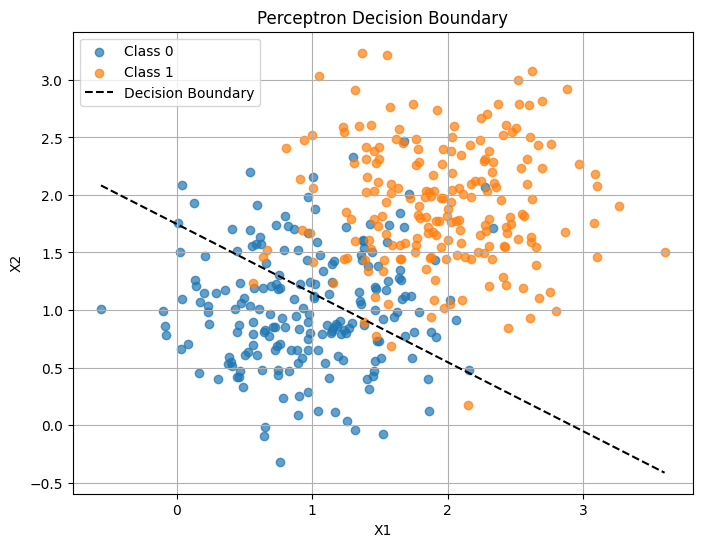

Least Squares Accuracy (clean data): 89.0 %


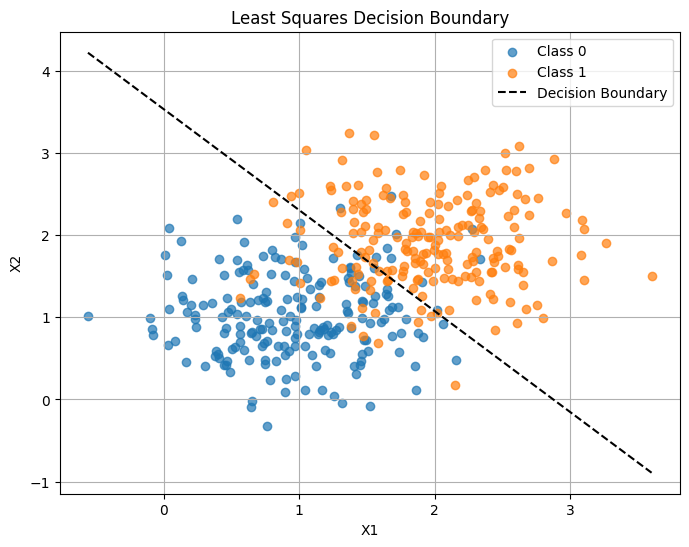

Perceptron Accuracy (with stronger outliers): 62.74999999999999 %


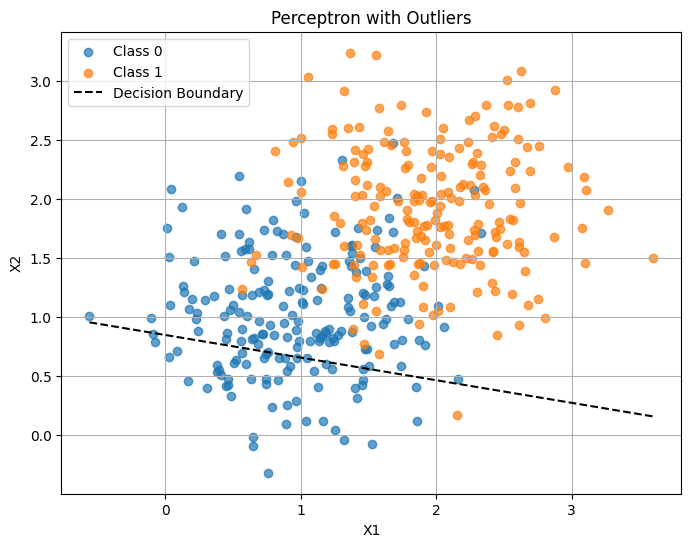

Least Squares Accuracy (with stronger outliers): 44.5 %


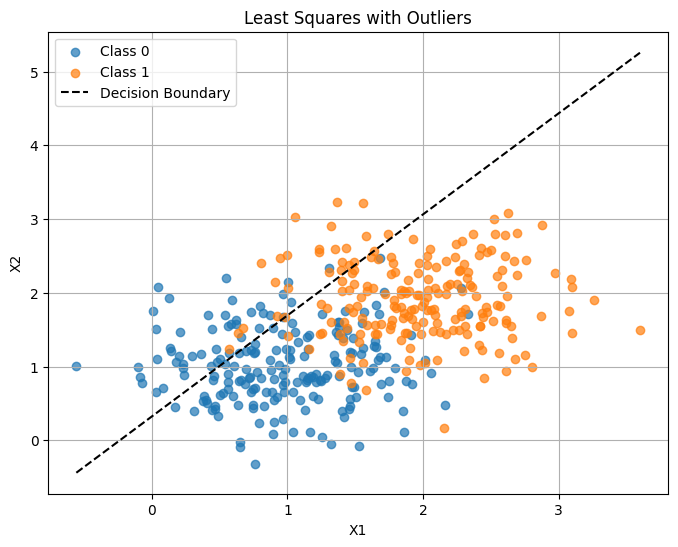

Perceptron Accuracy (XOR problem): 46.875 %


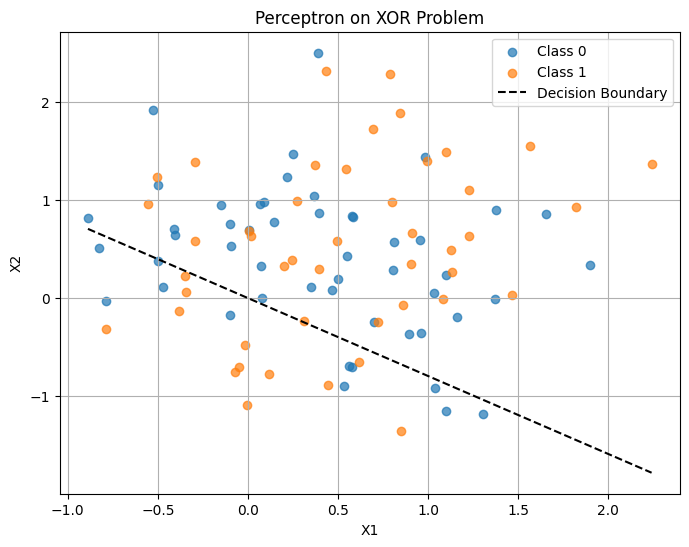

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

########################################
# Utility: Accuracy
########################################
def compute_accuracy(preds, true_labels):
    if set(np.unique(true_labels)).issubset({0, 1}):
        preds = (preds > 0).astype(int)
    return np.mean(preds == true_labels) * 100

def plot_boundary(X, y, w, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0', alpha=0.7)
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1', alpha=0.7)
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_vals = -(w[0] + w[1]*x_vals) / w[2]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()

########################################
#Part-3)-(a): Data generation
########################################
mean1 = [1, 1]
mean2 = [2, 2]
cov = [[0.3, 0], [0, 0.3]]

class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.vstack((class1_tr, class2_tr))
tr_targets = np.hstack((np.zeros(50), np.ones(50)))

class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
te_data = np.vstack((class1_te, class2_te))
te_targets = np.hstack((np.zeros(200), np.ones(200)))

########################################
#Part-3)-(b): Perceptron
########################################
def Perceptron(X_train, Y_train, X_test):
    epochs = 50
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    Y = np.where(Y_train == 0, -1, 1)
    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if np.sign(np.dot(w, X[i])) != Y[i]:
                w += Y[i] * X[i]

    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    predictions = np.sign(X_test_bias @ w)
    return predictions, w

preds_perceptron, w_perceptron = Perceptron(tr_data, tr_targets, te_data)
acc_perceptron = compute_accuracy(preds_perceptron, te_targets)
print("Perceptron Accuracy (clean data):", acc_perceptron, "%")
plot_boundary(te_data, te_targets, w_perceptron, "Perceptron Decision Boundary")

########################################
# Least Squares
########################################
def least_squares_classifier(X_train, Y_train, X_test):
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    Y = np.where(Y_train == 0, -1, 1)
    w = np.linalg.pinv(X) @ Y
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    predictions = np.sign(X_test_bias @ w)
    return predictions, w

preds_ls, w_ls = least_squares_classifier(tr_data, tr_targets, te_data)
acc_ls = compute_accuracy(preds_ls, te_targets)
print("Least Squares Accuracy (clean data):", acc_ls, "%")
plot_boundary(te_data, te_targets, w_ls, "Least Squares Decision Boundary")

########################################
#Part-3)-(c): With More & Stronger Outliers
########################################
# Add 15 strong outliers to class 1
outliers = np.random.multivariate_normal([7, 7], cov, 15)
class1_tr_outlier = np.vstack((class1_tr, outliers))

# Form new training data and labels
tr_data_outlier = np.vstack((class1_tr_outlier, class2_tr))
tr_targets_outlier = np.hstack((np.zeros(65), np.ones(50)))  # 65 class 0, 50 class 1

# Perceptron with outliers
preds_perceptron_out, w_perceptron_out = Perceptron(tr_data_outlier, tr_targets_outlier, te_data)
acc_perceptron_out = compute_accuracy(preds_perceptron_out, te_targets)
print("Perceptron Accuracy (with stronger outliers):", acc_perceptron_out, "%")
plot_boundary(te_data, te_targets, w_perceptron_out, "Perceptron with Outliers")

# Least Squares with outliers
preds_ls_out, w_ls_out = least_squares_classifier(tr_data_outlier, tr_targets_outlier, te_data)
acc_ls_out = compute_accuracy(preds_ls_out, te_targets)
print("Least Squares Accuracy (with stronger outliers):", acc_ls_out, "%")
plot_boundary(te_data, te_targets, w_ls_out, "Least Squares with Outliers")


########################################
#Part-3)-(d): XOR Problem
########################################
class1_mean1 = [0, 0]
class1_mean2 = [1, 1]
class2_mean1 = [0, 1]
class2_mean2 = [1, 0]

class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 60)
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 60)
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 60)
class2_data2 = np.random.multivariate_normal(class2_mean2, cov, 60)

data = np.vstack((class1_data1, class1_data2, class2_data1, class2_data2))
labels = np.hstack((np.ones(120), -1*np.ones(120)))  # +1 for class1, -1 for class2

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data, labels = data[indices], labels[indices]
split = int(0.6 * data.shape[0])
X_train, Y_train = data[:split], labels[:split]
X_test, Y_test = data[split:], labels[split:]

def Perceptron_XOR(X_train, Y_train, X_test):
    epochs = 50
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if np.sign(np.dot(w, X[i])) != Y_train[i]:
                w += Y_train[i] * X[i]
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    predictions = np.sign(X_test_bias @ w)
    return predictions, w

preds_xor, w_xor = Perceptron_XOR(X_train, Y_train, X_test)
acc_xor = compute_accuracy(preds_xor, Y_test)
print("Perceptron Accuracy (XOR problem):", acc_xor, "%")
plot_boundary(X_test, (Y_test == 1).astype(int), w_xor, "Perceptron on XOR Problem")


<b> Report your observations </b>

1.The decision boundary of the perceptron is linearly separable the two classes accurate but sensitive to the distribution of data points. In other case, the least squares method produces a slightly different boundary that minimizes errors globally.

2.The perceptron with outliers shows a bad boundary, mean while the least squares method adjusts its boundary.

3. The perceptron algorithm appears more efficient to minor variations in data compared to least squares regression, which is heavily influenced by outliers due to its minimizing squared errors.



<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




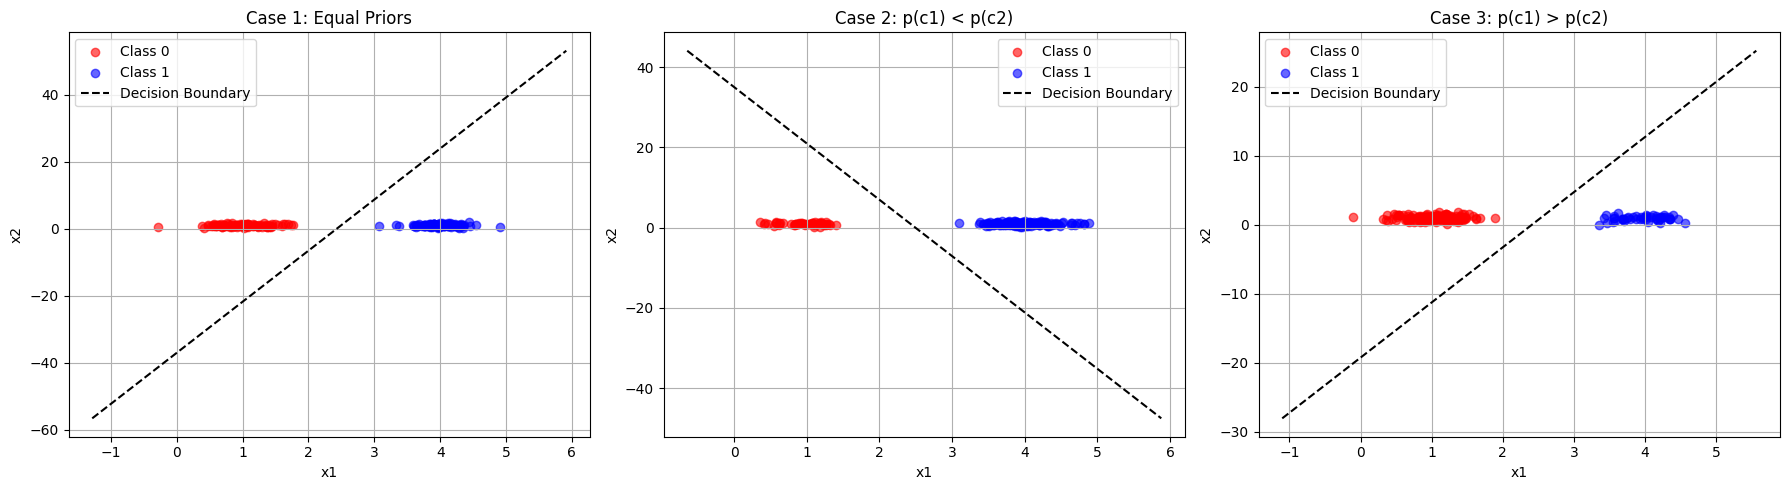

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##########################################
#Part-4a)-0: Data Generation
##########################################
m1 = [1, 1]
m2 = [4, 1]
cov = [[0.1, 0], [0, 0.1]]

#Case1: Generate 100 samples from each class
class1_case1 = np.random.multivariate_normal(m1, cov, 100)
class2_case1 = np.random.multivariate_normal(m2, cov, 100)
X_case1 = np.vstack((class1_case1, class2_case1))
Y_case1 = np.hstack((np.zeros(100), np.ones(100)))

#Case2: Generate 50 samples from class1 and 150 samples from class2
class1_case2 = np.random.multivariate_normal(m1, cov, 50)
class2_case2 = np.random.multivariate_normal(m2, cov, 150)
X_case2 = np.vstack((class1_case2, class2_case2))
Y_case2 = np.hstack((np.zeros(50), np.ones(150)))

#Case3: Generate 150 samples from class1 and 50 samples from class2
class1_case3 = np.random.multivariate_normal(m1, cov, 150)
class2_case3 = np.random.multivariate_normal(m2, cov, 50)
X_case3 = np.vstack((class1_case3, class2_case3))
Y_case3 = np.hstack((np.zeros(150), np.ones(50)))

##########################################
#Part-4a)-4: Decision Boundary Function
##########################################
def decisionBoundary(X_train, Y_train):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w

    # Priors
    p_c1 = np.mean(Y_train == 0)
    p_c2 = 1. - p_c1

    # Class means
    mean_1 = np.mean(X_train[Y_train == 0], axis=0)
    mean_2 = np.mean(X_train[Y_train == 1], axis=0)

    # Shared covariance
    cov1 = np.cov(X_train[Y_train == 0].T)
    cov2 = np.cov(X_train[Y_train == 1].T)
    cov = (cov1 + cov2) / 2

    inv_cov = np.linalg.inv(cov)
    w = inv_cov @ (mean_2 - mean_1)
    w0 = -0.5 * mean_2.T @ inv_cov @ mean_2 + 0.5 * mean_1.T @ inv_cov @ mean_1 + np.log(p_c2 / p_c1)

    return np.array([w0] + list(w))

##########################################
#Part-4a)-4: Plot Decision Boundaries
##########################################
def plot_decision_boundary(X, Y, title):
    params = decisionBoundary(X, Y)
    w0, w1, w2 = params

    # Plot data
    plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0', alpha=0.6)
    plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1', alpha=0.6)

    # Plot boundary
    x_vals = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 200)
    y_vals = -(w0 + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plot_decision_boundary(X_case1, Y_case1, 'Case 1: Equal Priors')

plt.subplot(1, 3, 2)
plot_decision_boundary(X_case2, Y_case2, 'Case 2: p(c1) < p(c2)')

plt.subplot(1, 3, 3)
plot_decision_boundary(X_case3, Y_case3, 'Case 3: p(c1) > p(c2)')

plt.tight_layout()
plt.show()


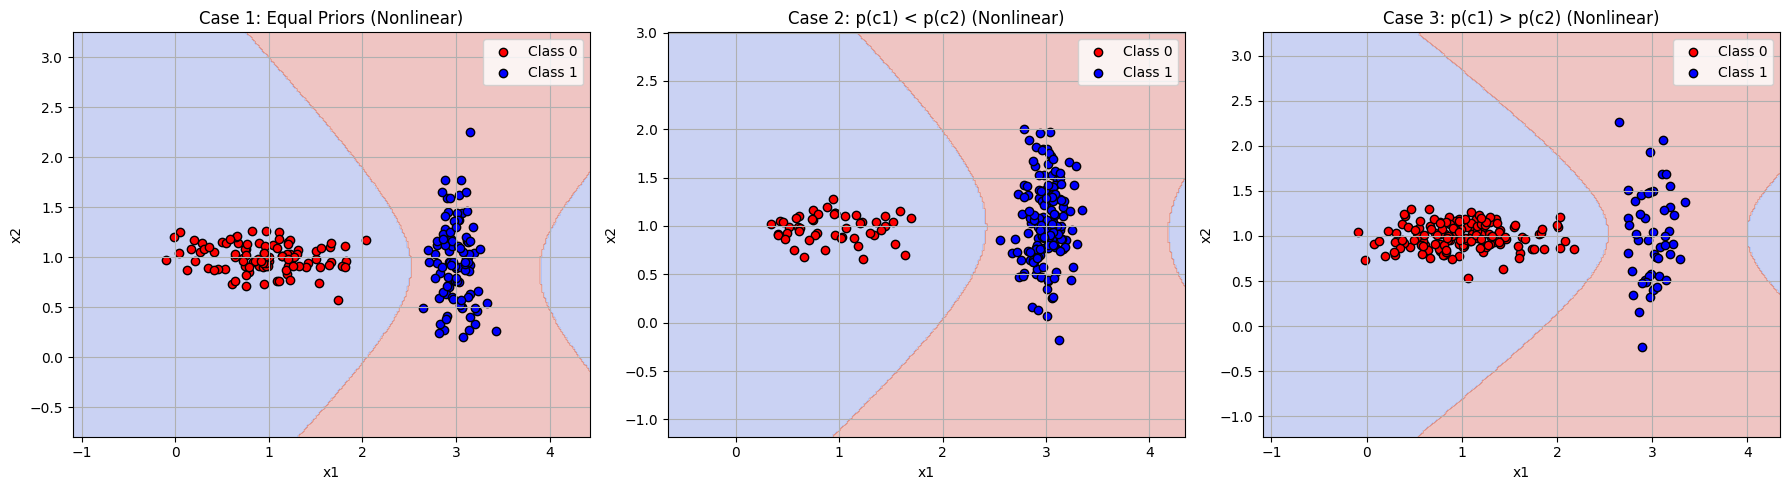

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##########################################
#Part-4b)-0: Data Generation
##########################################
m1 = [1, 1]
m2 = [3, 1]
cov1 = [[0.2, 0], [0, 0.02]]
cov2 = [[0.02, 0], [0, 0.2]]

#Case1: Generate 100 samples from each class
class1_case1 = np.random.multivariate_normal(m1, cov1, 100)
class2_case1 = np.random.multivariate_normal(m2, cov2, 100)
X_case1 = np.vstack((class1_case1, class2_case1))
Y_case1 = np.hstack((np.zeros(100), np.ones(100)))

#Case2: Generate 50 samples from class1 and 150 samples from class2
class1_case2 = np.random.multivariate_normal(m1, cov1, 50)
class2_case2 = np.random.multivariate_normal(m2, cov2, 150)
X_case2 = np.vstack((class1_case2, class2_case2))
Y_case2 = np.hstack((np.zeros(50), np.ones(150)))

#Case3: Generate 150 samples from class1 and 50 samples from class2
class1_case3 = np.random.multivariate_normal(m1, cov1, 150)
class2_case3 = np.random.multivariate_normal(m2, cov2, 50)
X_case3 = np.vstack((class1_case3, class2_case3))
Y_case3 = np.hstack((np.zeros(150), np.ones(50)))

##########################################
#Part-4b)-4: Decision Boundary Function
##########################################
def decisionBoundary(X_train, Y_train, X_test):
    # Inputs: Training data and Training labels
    # Outputs: Predicted labels for test data

    p_c1 = np.mean(Y_train == 0)
    p_c2 = 1. - p_c1

    mean_1 = np.mean(X_train[Y_train == 0], axis=0)
    mean_2 = np.mean(X_train[Y_train == 1], axis=0)

    cov1 = np.cov(X_train[Y_train == 0].T)
    cov2 = np.cov(X_train[Y_train == 1].T)

    inv_cov1 = np.linalg.inv(cov1)
    inv_cov2 = np.linalg.inv(cov2)

    det_cov1 = np.linalg.det(cov1)
    det_cov2 = np.linalg.det(cov2)

    predictions = []
    for x in X_test:
        x = x.reshape(-1, 1)
        diff1 = x - mean_1.reshape(-1, 1)
        diff2 = x - mean_2.reshape(-1, 1)

        term1 = -0.5 * diff1.T @ inv_cov1 @ diff1 - 0.5 * np.log(det_cov1) + np.log(p_c1)
        term2 = -0.5 * diff2.T @ inv_cov2 @ diff2 - 0.5 * np.log(det_cov2) + np.log(p_c2)

        prediction = 0 if term1 > term2 else 1
        predictions.append(prediction)

    return np.array(predictions)

##########################################
#Part-4b)-4: Plot Decision Regions
##########################################
def plot_decision_regions(X, Y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = decisionBoundary(X, Y, grid_points)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], c='red', label='Class 0', edgecolors='k')
    plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], c='blue', label='Class 1', edgecolors='k')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plot_decision_regions(X_case1, Y_case1, 'Case 1: Equal Priors (Nonlinear)')

plt.subplot(1, 3, 2)
plot_decision_regions(X_case2, Y_case2, 'Case 2: p(c1) < p(c2) (Nonlinear)')

plt.subplot(1, 3, 3)
plot_decision_regions(X_case3, Y_case3, 'Case 3: p(c1) > p(c2) (Nonlinear)')

plt.tight_layout()
plt.show()





<b> Report your observations </b>

1.In all three cases, the decision boundaries are nonlinear, indicating that the classification is capable of capturing complex relationships between the features

2.Case 1 (Equal Priors): The decision boundary is symmetric, as both classes have equal prior probabilities.

Case 2 (
p(c1)<p(c2)
p(c 1
 )<p(c
2)): The decision boundary shifts closer to Class 1 (red), giving more space to Class 2 (blue) due to its higher prior probability.

Case 3 (p(c1)>p(
c
2
)
p(c
1
 )>p(c
2
 )):The decision boundary shifts closer to Class 2 (blue), giving more space to Class 1 (red) due to its higher prior probability.

3.. The decision boundary adapts based on the priors but maintains a clear separation between the two classes.



<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations



Accuracy with Logistic Regression: 0.905 



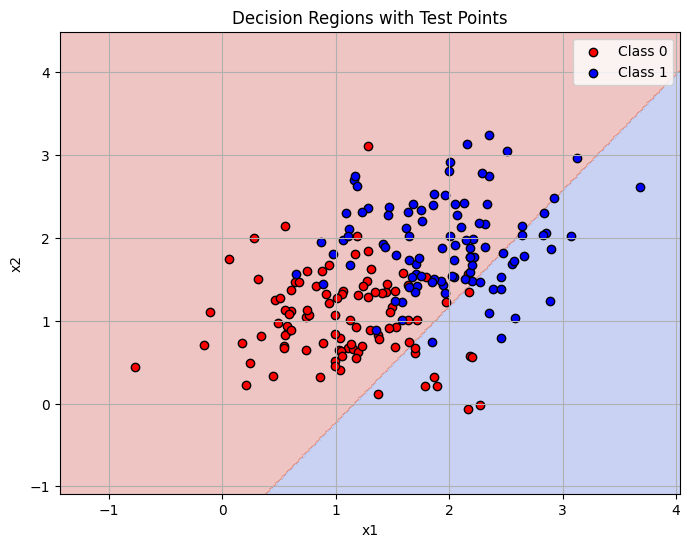

Accuracy with Logistic Regression (with outliers): 0.895


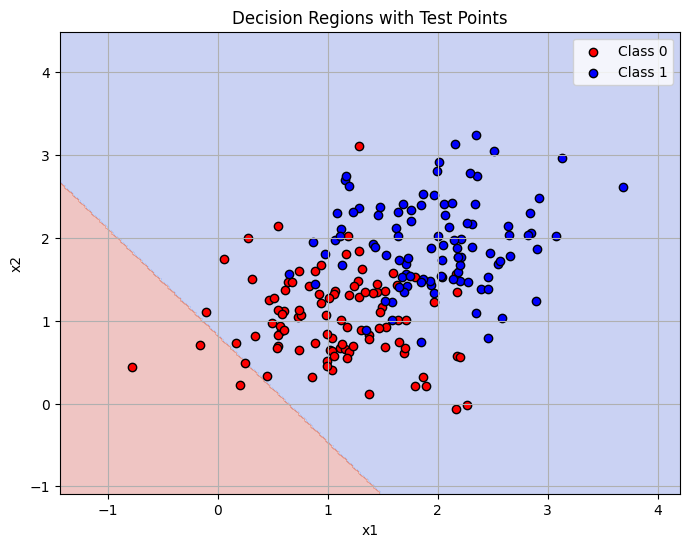

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Optional: for reproducibility

##################################################
# Part-5)-1: Data generation
##################################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.vstack((class1_tr, class2_tr))
tr_targets = np.hstack((np.zeros(50), np.ones(50)))

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 100)
class2_te = np.random.multivariate_normal(mean2, cov, 100)
te_data = np.vstack((class1_te, class2_te))
te_targets = np.hstack((np.zeros(100), np.ones(100)))

##################################################
# Part-5)-b: Logistic regression function
##################################################

# Stable sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip to prevent overflow
    return 1 / (1 + np.exp(-z))


def Logistic_Regression(X_train, Y_train, X_test):
    max_iter = 100
    threshold = 0.5
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
    w = np.random.randn(X.shape[1])  # Initialize weights

    for _ in range(max_iter):
        z = X @ w
        preds = sigmoid(z)
        R = np.diag(preds * (1 - preds))
        gradient = X.T @ (Y_train - preds)
        H = X.T @ R @ X
        try:
            delta = np.linalg.inv(H) @ gradient
        except np.linalg.LinAlgError:
            break  # In case H is singular
        w += delta

    X_test_ext = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    test_probs = sigmoid(X_test_ext @ w)
    test_preds = (test_probs >= threshold).astype(int)
    return test_preds

##################################################
# Part-5)-c: Accuracy function
##################################################

def LR_Accuracy(Y_test, Y_pred):
    return np.mean(Y_test == Y_pred)

# Predict and print accuracy
Y_pred = Logistic_Regression(tr_data, tr_targets, te_data)
acc = LR_Accuracy(te_targets, Y_pred)
print('\nAccuracy with Logistic Regression:', acc, '\n')

##################################################
# Part-5)-d: Plot decision regions
##################################################

def plot_decision_regions(X_train, Y_train, X_test, Y_test, model):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model(X_train, Y_train, grid).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1],
                c='red', label='Class 0', edgecolor='k', marker='o')
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1],
                c='blue', label='Class 1', edgecolor='k', marker='o')

    plt.title('Decision Regions with Test Points')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot without outliers
plot_decision_regions(tr_data, tr_targets, te_data, te_targets, Logistic_Regression)

##################################################
# Part-5)-e: Add outliers and retrain
##################################################

# Add outliers to class 0
outliers = np.array([[2.8, 2.7], [3.0, 3.1], [3.2, 3.0]])
tr_data_outlier = np.vstack((tr_data, outliers))
tr_targets_outlier = np.hstack((tr_targets, np.zeros(len(outliers))))  # Label as class 0

# Predict and print accuracy with outliers
Y_pred_outlier = Logistic_Regression(tr_data_outlier, tr_targets_outlier, te_data)
acc_outlier = LR_Accuracy(te_targets, Y_pred_outlier)
print("Accuracy with Logistic Regression (with outliers):", acc_outlier)

# Plot with outliers
plot_decision_regions(tr_data_outlier, tr_targets_outlier, te_data, te_targets, Logistic_Regression)


<b>Report your observations</b>

1.In the first graph, the decision boundary is diagonal, splitting the feature space evenly.In the second graph, the decision boundary shifts, favoring Class 1 with a larger region.

2.Class 0 dominates the lower-left region in both graphs.Class 1 occupies a larger area in the second graph compared to the first.


3.Both graphs show overlapping points near the boundary, indicating misclassifications.

<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


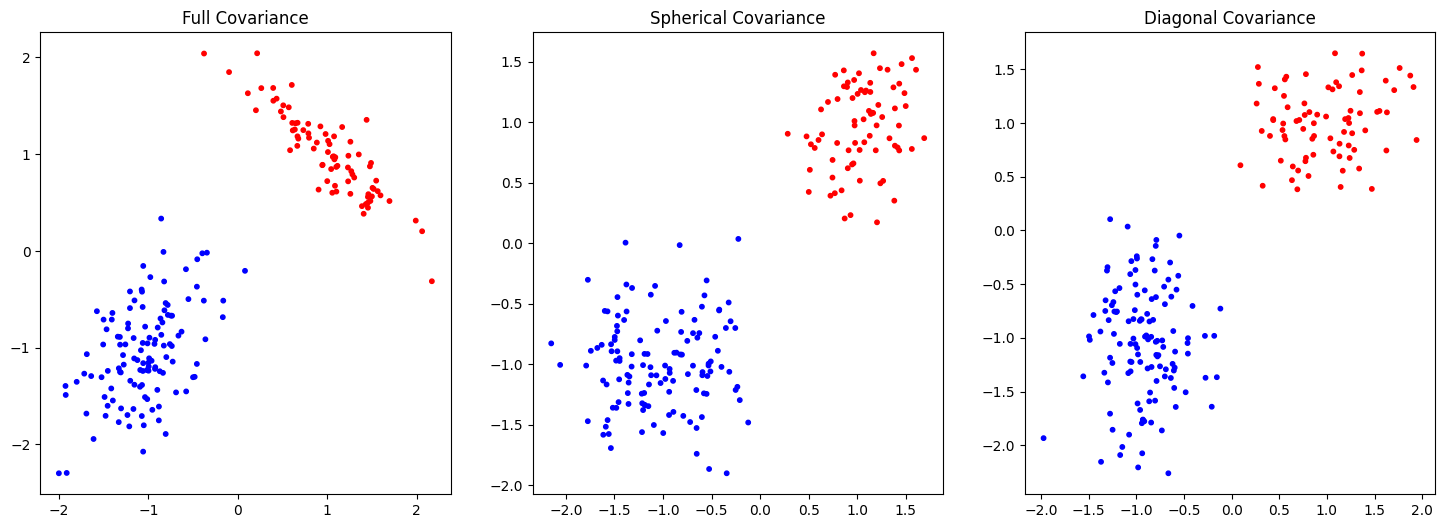

In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random

##########################################
# Part-6a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    data = []
    labels = []
    for _ in range(N):
        k = random.choices([0, 1], weights=pi)[0]
        sample = np.random.multivariate_normal(mu[k], sigma[k])
        data.append(sample)
        labels.append(k)
    return np.asarray(data), np.asarray(labels)

# Parameters
mu1 = np.array([-1.0, -1.0])
mu2 = np.array([1.0, 1.0])
sig1 = np.array([[0.15, 0.10], [0.10, 0.25]])
sig2 = np.array([[0.3, -0.25], [-0.25, 0.25]])
pi = [0.6, 0.4]
n_points = 200

# Spherical
sig1_s = np.array([[0.2, 0.0], [0.0, 0.2]])
sig2_s = np.array([[0.1, 0.0], [0.0, 0.1]])
# Diagonal
sig1_d = np.array([[0.1, 0.0], [0.0, 0.2]])
sig2_d = np.array([[0.2, 0.0], [0.0, 0.1]])

# Generate datasets
data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], n_points)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], n_points)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], n_points)

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].scatter(data_full[:, 0], data_full[:, 1], c=labels_full, cmap='bwr', s=10)
ax[0].set_title('Full Covariance')
ax[1].scatter(data_sp[:, 0], data_sp[:, 1], c=labels_sp, cmap='bwr', s=10)
ax[1].set_title('Spherical Covariance')
ax[2].scatter(data_dg[:, 0], data_dg[:, 1], c=labels_dg, cmap='bwr', s=10)
ax[2].set_title('Diagonal Covariance')
plt.show()

Step 0, Log-likelihood: -728.9283373775463


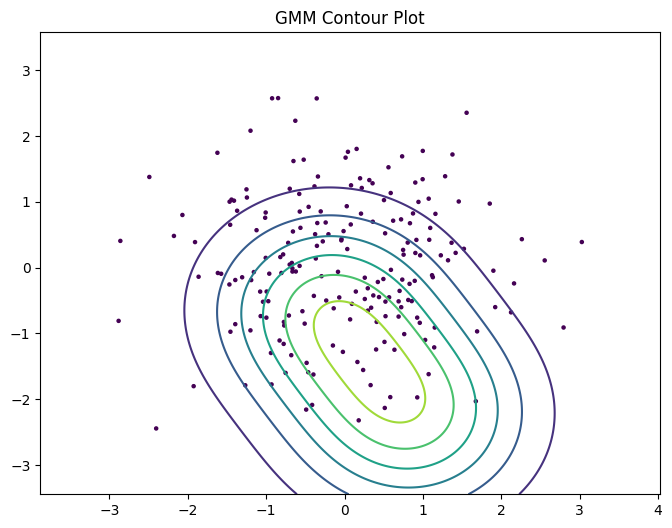

Step 1, Log-likelihood: -588.1882080476471


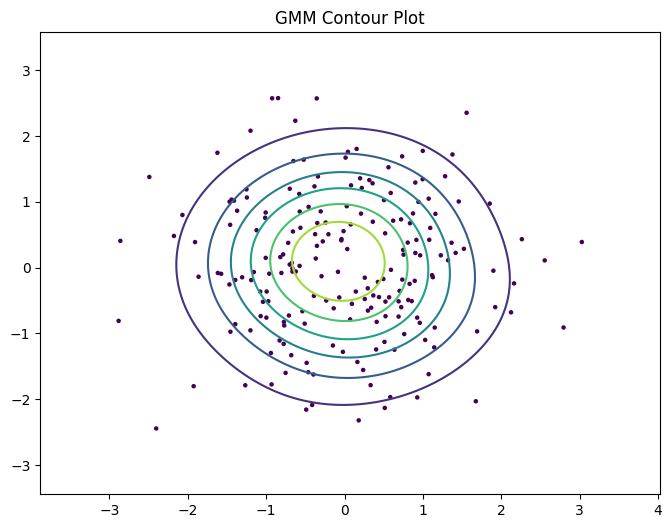

Step 2, Log-likelihood: -587.6568213324655


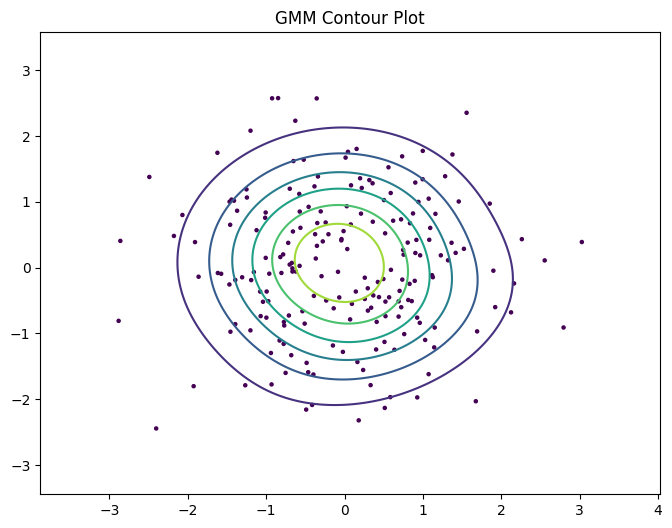

Step 3, Log-likelihood: -587.4251727631038


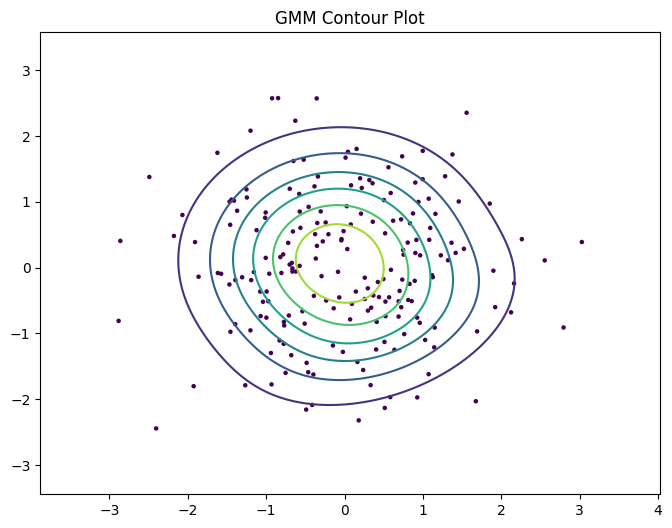

Step 4, Log-likelihood: -587.2809231402828


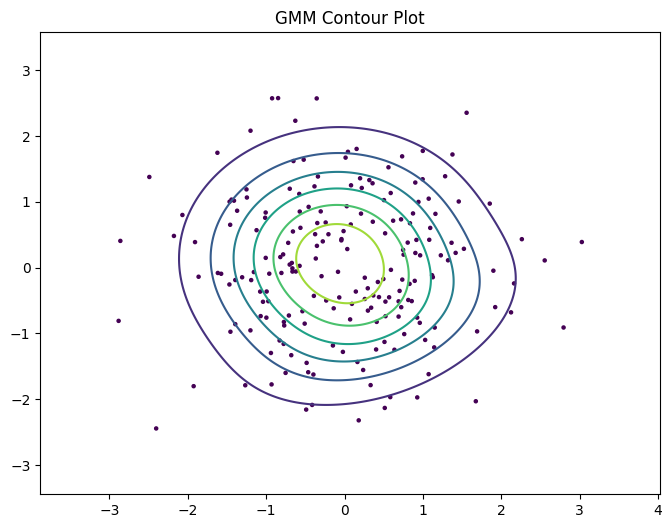

Step 5, Log-likelihood: -587.1866666565331


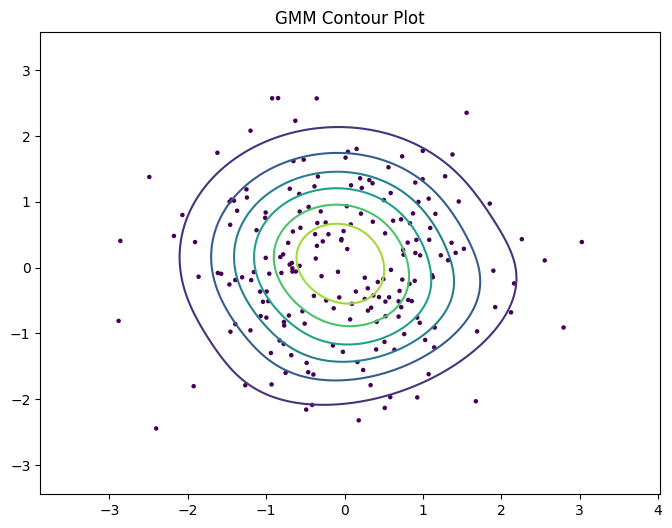

Step 6, Log-likelihood: -587.1275777895219


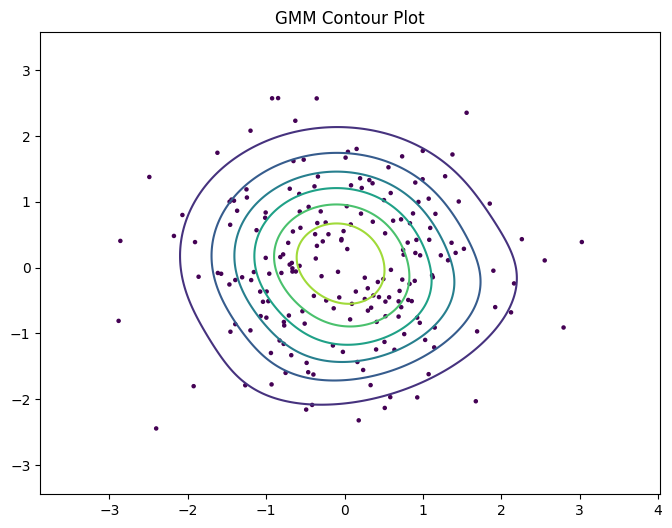

Step 7, Log-likelihood: -587.0917461575765


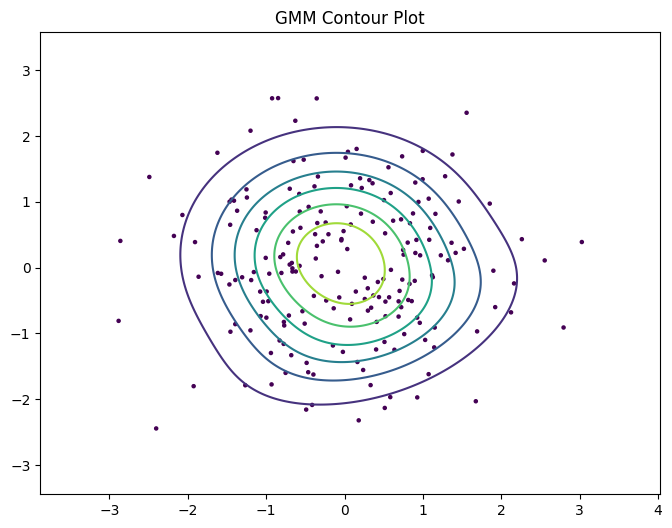

Step 8, Log-likelihood: -587.0700463808115


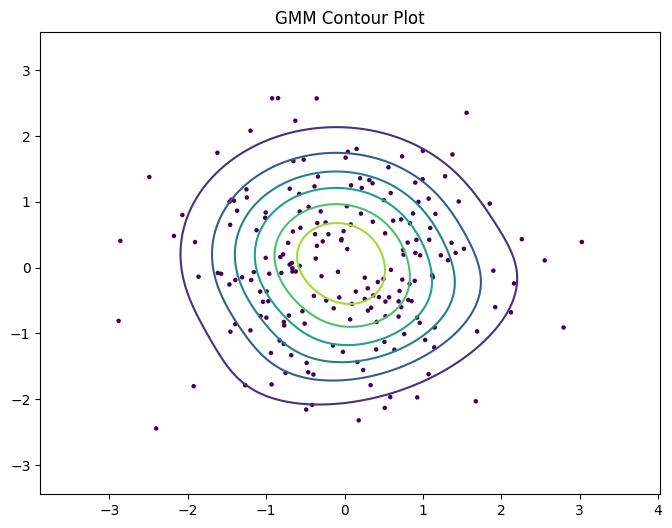

Step 9, Log-likelihood: -587.056600065058


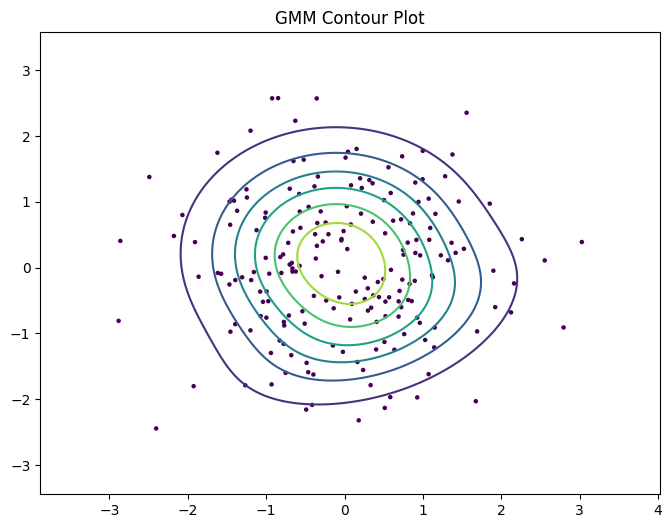

In [ ]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-b: Implementation of Expectation-Maximization (EM) algorithm
##########################################

def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
    N = data.shape[0]
    M = len(pi)
    like = np.zeros((N, M))

    for k in range(M):
        like[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])

    total_likelihood = np.sum(like, axis=1)

    if log_likelihood:
        return np.sum(np.log(total_likelihood))
    elif likelihoods:
        return total_likelihood
    else:
        return None

def expectation(data, pi, mu, sigma):
    N = data.shape[0]
    M = len(pi)
    gamma = np.zeros((N, M))
    for n in range(N):
        for k in range(M):
            numerator = pi[k] * multivariate_normal.pdf(data[n], mean=mu[k], cov=sigma[k])
            denominator = np.sum([pi[j] * multivariate_normal.pdf(data[n], mean=mu[j], cov=sigma[j]) for j in range(M)])
            gamma[n, k] = numerator / denominator
    return gamma

def maximization(data, gamma):
    N, D = data.shape
    M = gamma.shape[1]

    Nk = np.sum(gamma, axis=0)
    mu = [np.sum(gamma[:, k][:, np.newaxis] * data, axis=0) / Nk[k] for k in range(M)]
    sigma = []
    for k in range(M):
        diff = data - mu[k]
        cov = np.dot((gamma[:, k][:, np.newaxis] * diff).T, diff) / Nk[k]
        sigma.append(cov)
    pi = Nk / N
    return pi, mu, sigma

def plot_contours(data, labels, pi, mu, sigma):
    x = np.linspace(np.min(data[:, 0])-1, np.max(data[:, 0])+1, 300)
    y = np.linspace(np.min(data[:, 1])-1, np.max(data[:, 1])+1, 300)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T

    Z = np.zeros((len(XX),))
    for k in range(len(pi)):
        Z += pi[k] * multivariate_normal.pdf(XX, mean=mu[k], cov=sigma[k])
    Z = Z.reshape(X.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=5)
    plt.title("GMM Contour Plot")
    plt.show()

# Example initialization - you can replace these with actual synthetic data
data = np.random.randn(200, 2)
labels = np.zeros(200)
N = data.shape[0]
D = data.shape[1]
M = 2

pi = np.ones(M) / M
mu = [np.random.randn(D) for _ in range(M)]
sigma = [np.eye(D) for _ in range(M)]

nsteps = 10
for index in range(nsteps):
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
    print(f"Step {index}, Log-likelihood: {ll}")
    plot_contours(data, labels, pi, mu, sigma)
    gamma = expectation(data, pi, mu, sigma)
    pi, mu, sigma = maximization(data, gamma)

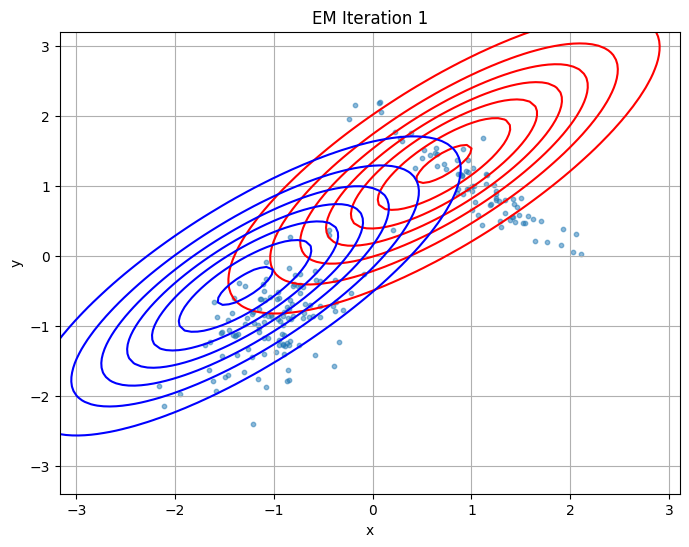

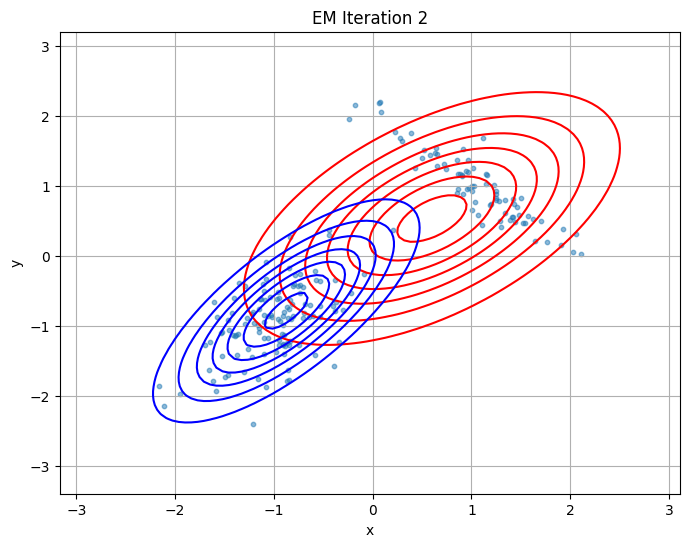

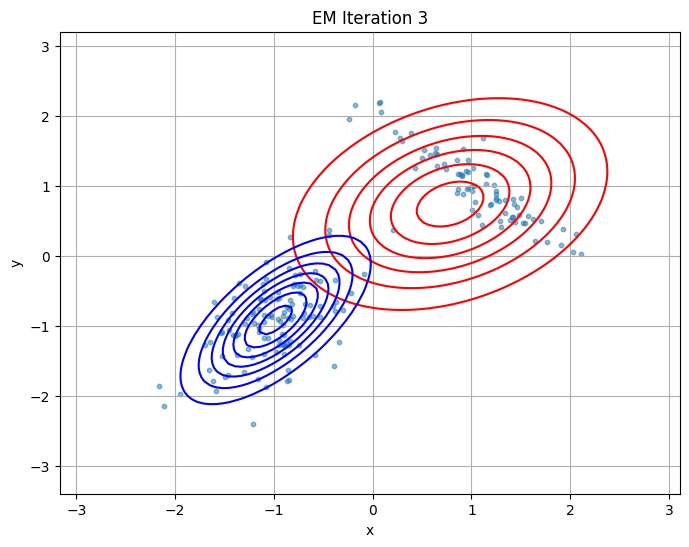

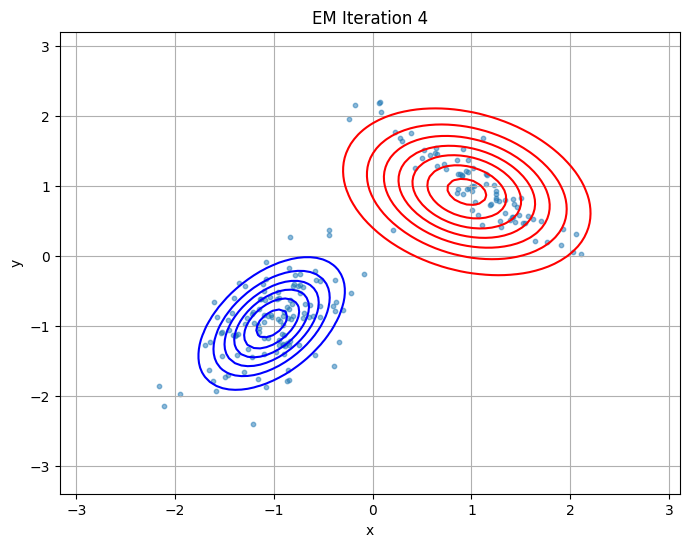

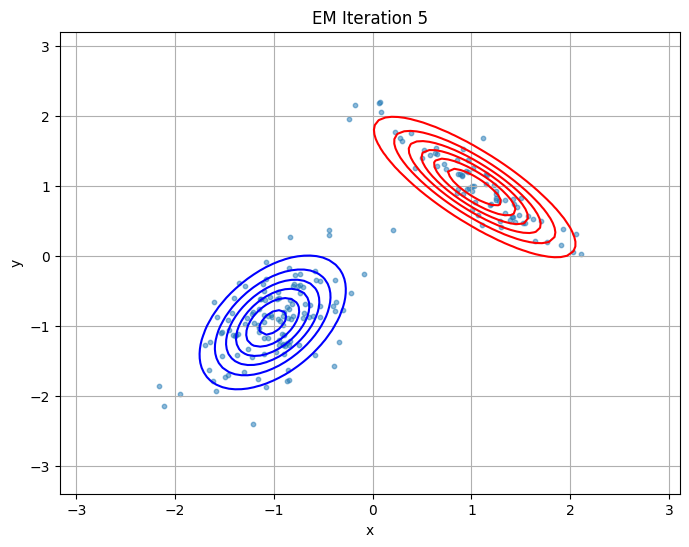

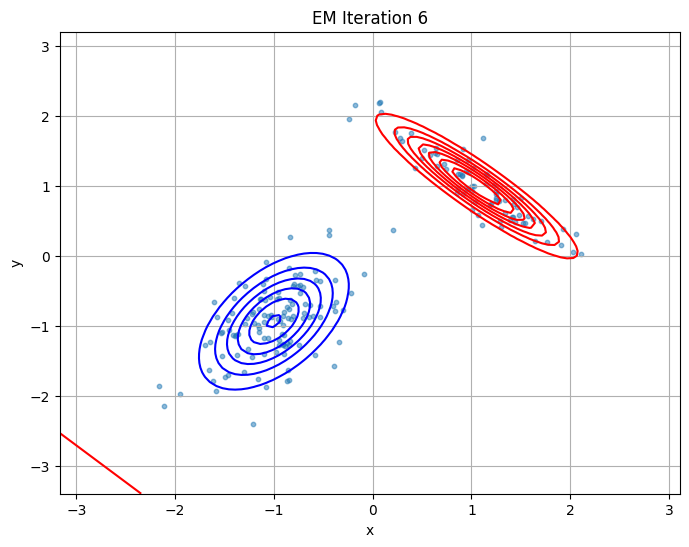

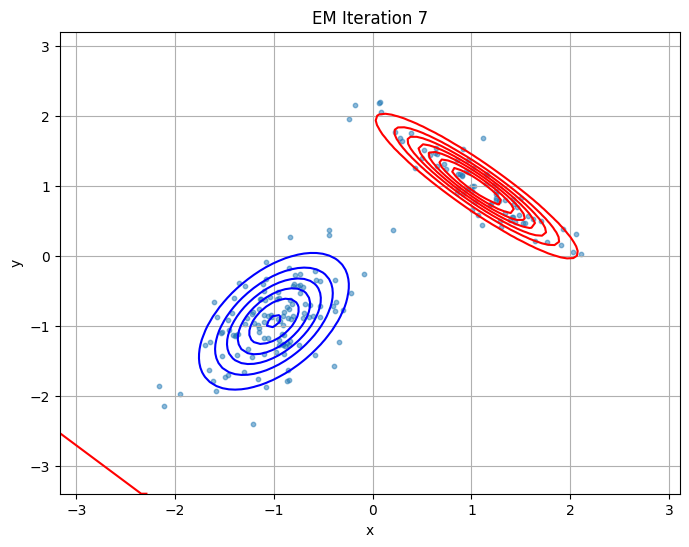

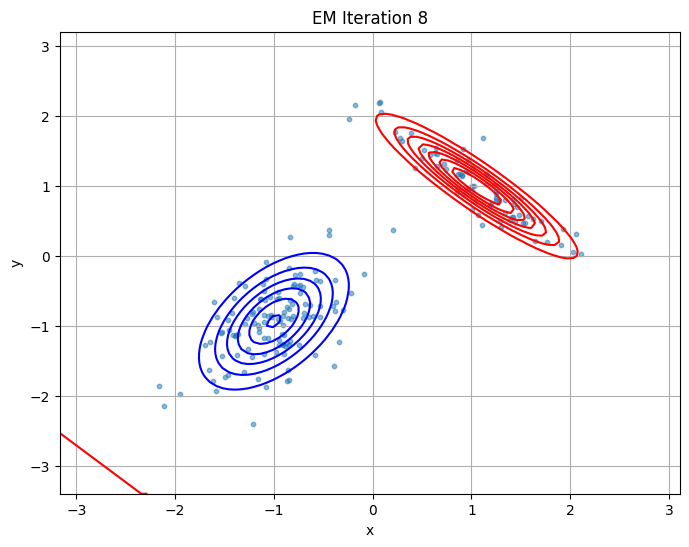

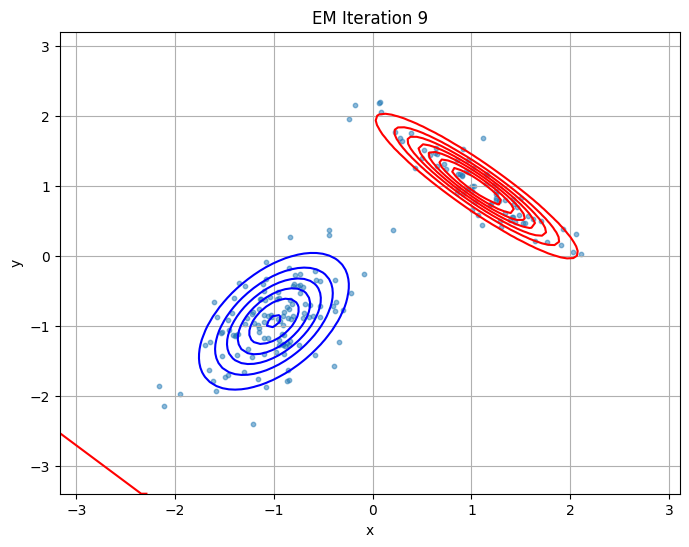

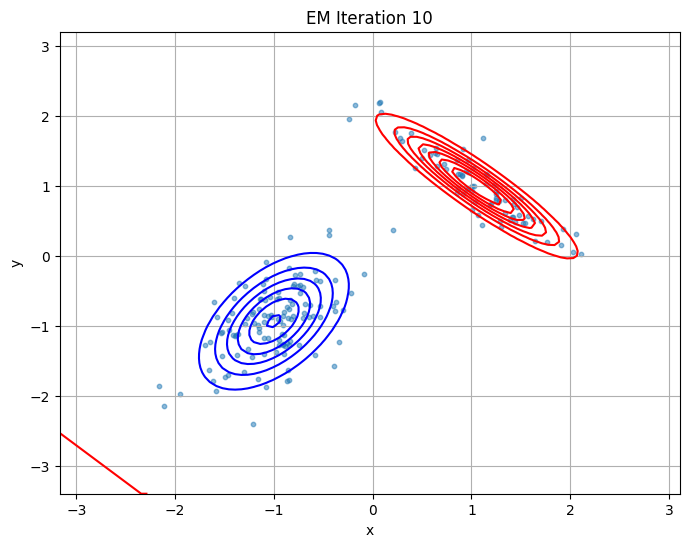

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Function to compute log-likelihood
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
    N = data.shape[0]
    M = len(pi)
    total_likelihood = np.zeros(N)
    for k in range(M):
        total_likelihood += pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])
    if log_likelihood:
        return np.sum(np.log(total_likelihood))
    if likelihoods:
        return total_likelihood
    return None

# Expectation step
def expectation(data, pi, mu, sigma):
    N = data.shape[0]
    M = len(pi)
    gamma = np.zeros((N, M))
    for k in range(M):
        gamma[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])
    gamma = gamma / gamma.sum(axis=1, keepdims=True)
    return gamma

# Maximization step
def maximization(data, gamma):
    N, D = data.shape
    M = gamma.shape[1]
    Nk = gamma.sum(axis=0)
    mu = [(gamma[:, k].reshape(-1, 1) * data).sum(axis=0) / Nk[k] for k in range(M)]
    sigma = []
    for k in range(M):
        diff = data - mu[k]
        weighted_sum = np.dot((gamma[:, k].reshape(-1, 1) * diff).T, diff)
        sigma.append(weighted_sum / Nk[k])
    pi = Nk / N
    return pi, mu, sigma

# Plotting contours and data
def plot_contours(data, pi, mu, sigma, iteration):
    x, y = np.meshgrid(np.linspace(data[:,0].min()-1, data[:,0].max()+1, 100),
                       np.linspace(data[:,1].min()-1, data[:,1].max()+1, 100))
    pos = np.dstack((x, y))
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.5)
    colors = ['r', 'b']
    for k in range(len(pi)):
        rv = multivariate_normal(mu[k], sigma[k])
        plt.contour(x, y, rv.pdf(pos), colors=colors[k])
    plt.title(f"EM Iteration {iteration}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Synthetic data generation for 2-component GMM
np.random.seed(42)
pi_true = [0.6, 0.4]
mu_true = [np.array([-1.0, -1.0]), np.array([1.0, 1.0])]
sigma_true = [np.array([[0.15, 0.1], [0.1, 0.25]]),
              np.array([[0.3, -0.25], [-0.25, 0.25]])]
data = []
for _ in range(200):
    k = np.random.choice(len(pi_true), p=pi_true)
    point = np.random.multivariate_normal(mu_true[k], sigma_true[k])
    data.append(point)
data = np.array(data)

# Initialize parameters for EM
M = 2
N, D = data.shape
pi = np.ones(M) / M
mu = [data[np.random.choice(N)] for _ in range(M)]
sigma = [np.cov(data.T) for _ in range(M)]

# Run EM algorithm and plot contours
nsteps = 10
for i in range(nsteps):
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
    plot_contours(data, pi, mu, sigma, i+1)
    gamma = expectation(data, pi, mu, sigma)
    pi, mu, sigma = maximization(data, gamma)


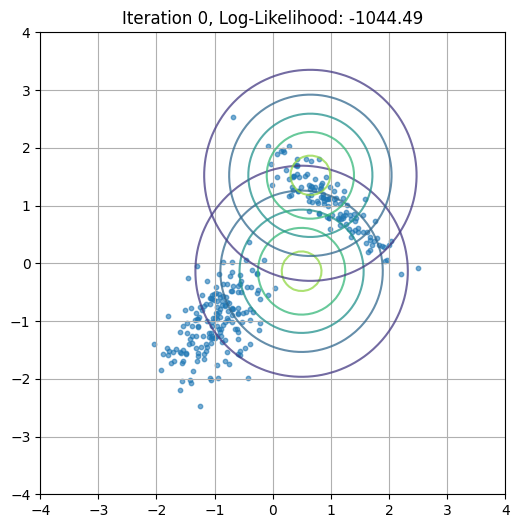

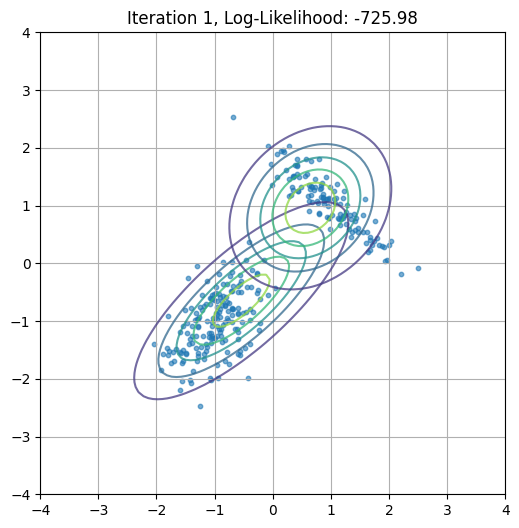

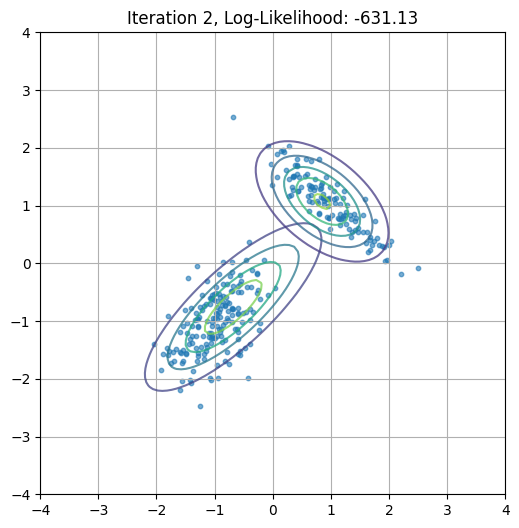

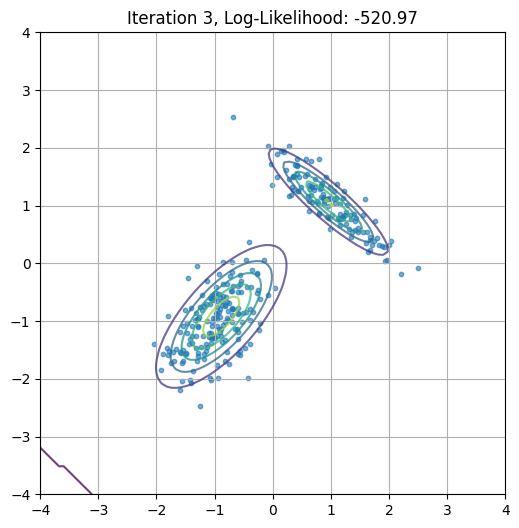

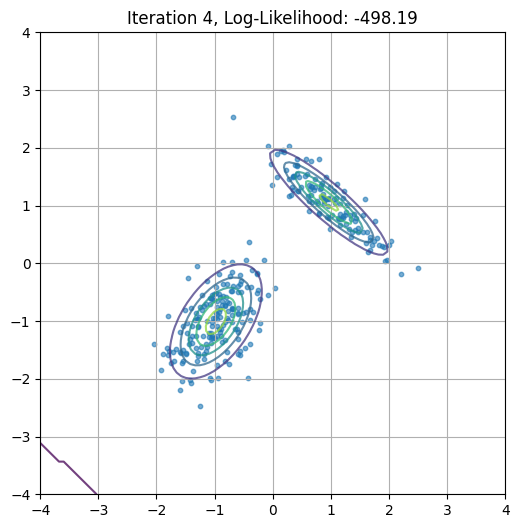

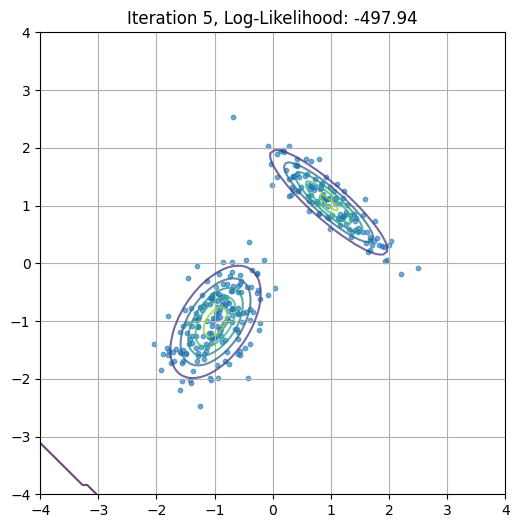

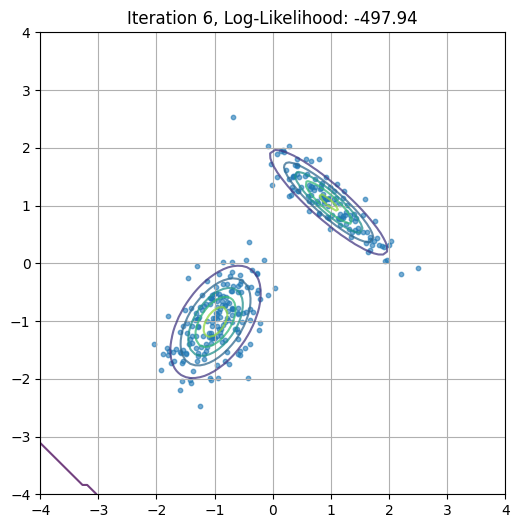

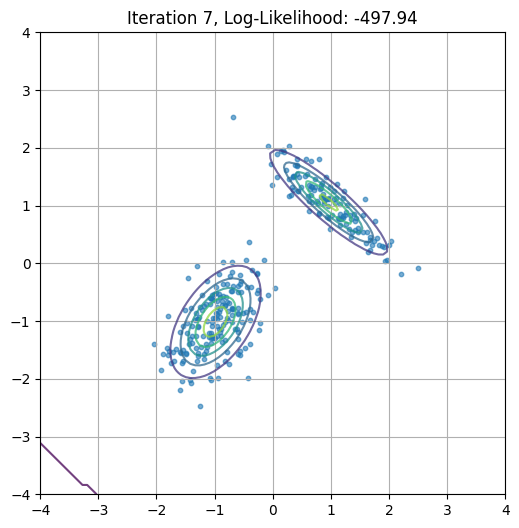

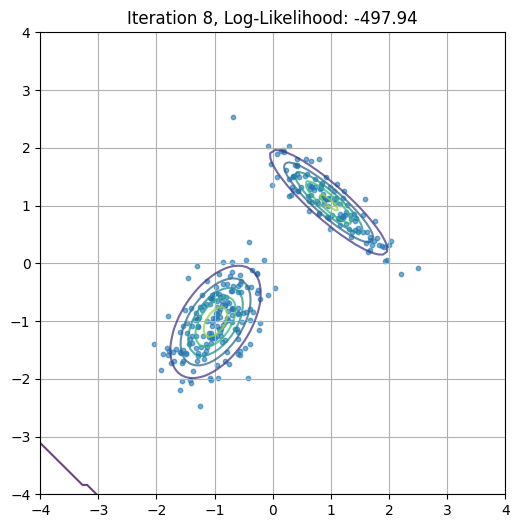

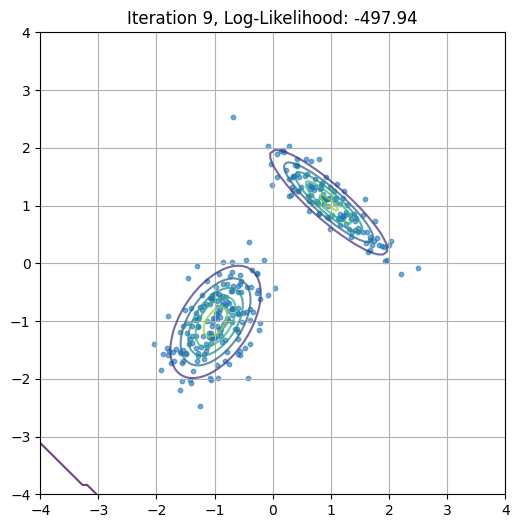

In [ ]:
############################################################################
##Part-6)-d: Understand the issues with EM algorithm
############################################################################

# All imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Function to generate synthetic GMM data
def generateData(pi, mu, sigma, N):
    labels = np.random.choice(len(pi), size=N, p=pi)
    data = [np.random.multivariate_normal(mu[i], sigma[i]) for i in labels]
    return np.array(data), np.array(labels)

# Function to compute the log-likelihood
def likelihood(data, pi, mu, sigma):
    N = data.shape[0]
    M = len(pi)
    ll = 0
    for n in range(N):
        temp = 0
        for k in range(M):
            temp += pi[k] * multivariate_normal.pdf(data[n], mean=mu[k], cov=sigma[k])
        ll += np.log(temp)
    return ll

# Expectation step
def expectation(data, pi, mu, sigma):
    N = data.shape[0]
    M = len(pi)
    gamma = np.zeros((N, M))
    for n in range(N):
        denominator = 0
        for k in range(M):
            gamma[n, k] = pi[k] * multivariate_normal.pdf(data[n], mean=mu[k], cov=sigma[k])
            denominator += gamma[n, k]
        gamma[n, :] /= denominator
    return gamma

# Maximization step
def maximization(data, gamma):
    N, D = data.shape
    M = gamma.shape[1]
    Nk = np.sum(gamma, axis=0)
    pi_new = Nk / N
    mu_new = np.dot(gamma.T, data) / Nk[:, None]
    sigma_new = []
    for k in range(M):
        diff = data - mu_new[k]
        cov_k = np.dot(gamma[:, k] * diff.T, diff) / Nk[k]
        sigma_new.append(cov_k)
    return pi_new, mu_new, sigma_new

# Function to plot contours
def plot_contours(data, pi, mu, sigma, title=''):
    x, y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    pos = np.dstack((x, y))
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.6)
    for k in range(len(pi)):
        rv = multivariate_normal(mean=mu[k], cov=sigma[k])
        plt.contour(x, y, rv.pdf(pos), levels=5, alpha=0.75)
    plt.title(title)
    plt.grid()
    plt.show()

# Run EM with visualization
def run_EM_with_plot(data, pi_init, mu_init, sigma_init, steps=10):
    pi, mu, sigma = pi_init, mu_init, sigma_init
    for i in range(steps):
        ll = likelihood(data, pi, mu, sigma)
        plot_contours(data, pi, mu, sigma, title=f'Iteration {i}, Log-Likelihood: {ll:.2f}')
        gamma = expectation(data, pi, mu, sigma)
        pi, mu, sigma = maximization(data, gamma)
    return pi, mu, sigma

# Main driver
if __name__ == "__main__":
    pi_true = [0.6, 0.4]
    mu_true = [np.array([-1.0, -1.0]), np.array([1.0, 1.0])]
    sigma_full = [np.array([[0.15, 0.1], [0.1, 0.25]]), np.array([[0.3, -0.25], [-0.25, 0.25]])]

    # Generate synthetic data
    data, labels = generateData(pi_true, mu_true, sigma_full, 300)

    # Initial parameters
    np.random.seed(42)
    pi_init = [0.5, 0.5]
    mu_init = [np.random.randn(2), np.random.randn(2)]
    sigma_init = [np.eye(2) for _ in range(2)]

    # Run EM
    final_pi, final_mu, final_sigma = run_EM_with_plot(data, pi_init, mu_init, sigma_init, steps=10)








<b> Report your observations </b>

1.Poor initialization can lead to bad clustering or slow convergence.

2.Spherical gives poor results for non-circular clusters.

3.Spherical is faster but less accurate; full is slower but models data more precisely.

